# Toxic Comment Classification EDA

In this notebook, we'll be understanding the dataset and find out any patterns within the comments, find any correlations between toxic comment classification tags, and check how clean our dataset is.

Note: Some of the ideas in here are taken from [Jagan](https://www.kaggle.com/jagangupta/stop-the-s-toxic-comments-eda), which are the heatmap, and using the 'clean' feature.

In [37]:
import pandas as pd
import numpy as n

import matplotlib.pyplot as plt
import seaborn as sns

import re

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

%matplotlib inline

In [2]:
eda = pd.read_csv("input/train.csv")

In [3]:
eda.shape

(159571, 8)

In [4]:
eda.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

# What Makes A Good/Bad Comment?

In [26]:
bad_tags = eda.iloc[:, 2:].sum()

rowsums= eda.iloc[:,2:].sum(axis=1)

eda['clean'] = (rowsums == 0)
binary = {True : 1, False : 0} #0 - bad comments, 1 - clean comments
eda["clean"] = eda["clean"].map(binary)

In [27]:
eda.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate', 'clean'],
      dtype='object')

In [30]:
#checking for a good comment
eda[eda["clean"] == 1].sample(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
37352,63b83611e8769940,No such thing as Islamic mathematics \n\nThe r...,0,0,0,0,0,0,1
86739,e800e087be99c895,Cleveland Street Scandal \n\nJames Pope Hennes...,0,0,0,0,0,0,1
22353,3af95a148d7beec0,Also I've actually been on wikipedia for many ...,0,0,0,0,0,0,1
155326,bc25d572e8a74b68,|Experiencing a bad time of my life,0,0,0,0,0,0,1
45124,78aaff82c05bd7b8,"Try to ask at the talk page for fo:Euro, Faroe...",0,0,0,0,0,0,1
159164,f98a2bb4ad624306,", definitely far more than you",0,0,0,0,0,0,1
115634,6a6e916b9c46f7d2,"i wish to apologize, i am not use to this and ...",0,0,0,0,0,0,1
130758,bb7b7ea2ca193227,"""\n\nAnswer: Andrews is stated as specifically...",0,0,0,0,0,0,1
118121,77029e8dc81d444b,"""::*Rockpocket, please don't lecture about hat...",0,0,0,0,0,0,1
83756,e0255c130686abe8,""" Editors as you and me do not decide what i...",0,0,0,0,0,0,1


By sampling some of the clean comments, it can be observed that:

   - The tone of the comments are not aggressive. 
   - Sentiments are ranging from neutral to positive.

In [32]:
#checking for bad comments
eda[eda["clean"] == 0].sample(15)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
7348,1388ee1ed652eca0,"You know what, this is bullshit. Tried to do ...",1,0,1,0,0,0,0
28793,4c48f1a5e4138946,You need to stop changing everything Im doing ...,1,0,1,0,1,0,0
71748,c01dd30e5a4234ea,don't \n\nshit your fuck asshoul 182.16.240.42,1,0,1,0,0,0,0
149422,5bfd17f0c9b0046d,When the fuck are you goona change the New Eng...,1,0,1,0,0,0,0
40989,6d60cced80491ece,"""\nI've had it, you ignorant fool. If it's cal...",1,0,0,0,0,0,0
149749,60cc467c77f3ed4f,"You will not stop a JEDI KNIGHT, stop trying t...",1,0,0,0,0,0,0
4946,0d17ad5df146d4f2,i lookd back in history when it was put it had...,1,0,1,0,1,0,0
65751,afdb691bbb653ec9,I need to destroy as many articles as possible...,1,0,0,0,0,0,0
43308,739e86bffa0b0491,"""\n If I was rude https://www.youtube.com/watc...",1,0,0,0,0,0,0
110607,4fb18d809ebbfc4b,Note to self: dick unchecked . Gravedancing. -,1,0,0,0,0,0,0


Categorizing all non clean samples, we get:

   - A lot of the non clean comments have a lot of profanity in them.
   - The overall tone is aggressive and is aimed to hurt the receiver of the comment.
   - They all show a highly negative sentiment.

It can also be seen that there may be some linear correlation between these toxic classification tags, since whenever the comment is classified is toxic, it can also be classified as obscene as well. 

Let's check this by looking at a heatmap.

Text(0.5,1,'Correlation Between Toxic Classification Tags')

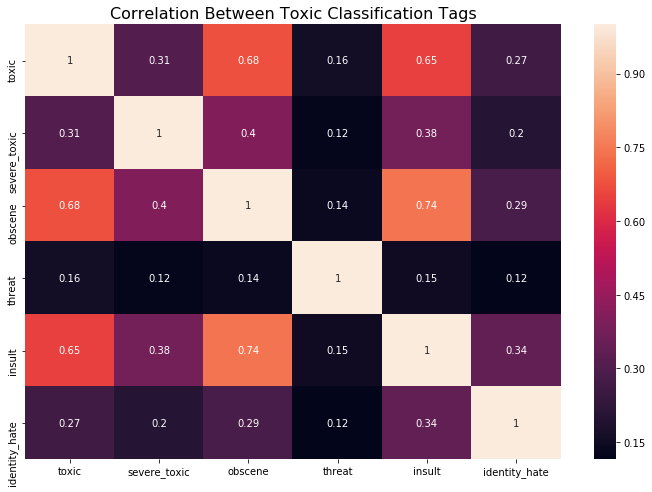

In [36]:
plt.figure(figsize = (12, 8))
sns.heatmap(eda.iloc[:, 2:-1].corr(), annot = True)

plt.title("Correlation Between Toxic Classification Tags", fontsize = 16)

In the graph above, it is shown that the following classificatio tags are correlated:

   - Obscene and Toxic
   - Insult and Toxic
   - Insult and Obscene
   
Next, let's find out if our observations in the last section, are correct if clean and non-clean coments can be separated by their sentiment scores.

C:\Users\Pierce\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


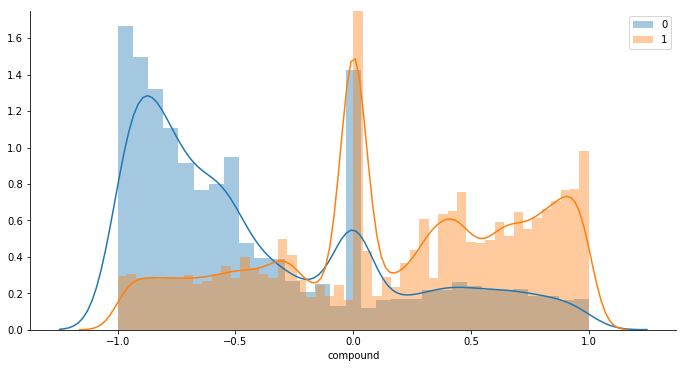

In [43]:
sentiment = SentimentIntensityAnalyzer()

toxic_vs_clean = []

for index in eda.index:
    toxic_vs_clean.append(sentiment.polarity_scores(eda.iloc[index, 1]))
    
data = pd.concat([pd.DataFrame(toxic_vs_clean), eda["clean"]], axis =1)

g = sns.FacetGrid(data, hue = "clean")
g.map(sns.distplot, "compound")
g.fig.set_size_inches(12, 6)

plt.legend()

The sentiment of each comment is measured by using the VaderSentimentAnalyzer from NLTK. It is a lexcon based algorithm wherein, there is a large corpus that associates each word with a weight if it is negative or not. The compound scores for this algorithm is between -1 to 1, where the former is a negative comment while the latter is otherwise.

For the graph above, it can be shown that somehow observations found on the last section is correct. However, there are still overlaps between negative and positive comments because of the Vader Sentiment is using a lexicon based classifier, and does not look into the structure of the corpus.

Lastly, let's take a look at the length of each comment if it can affect the classification.

C:\Users\Pierce\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


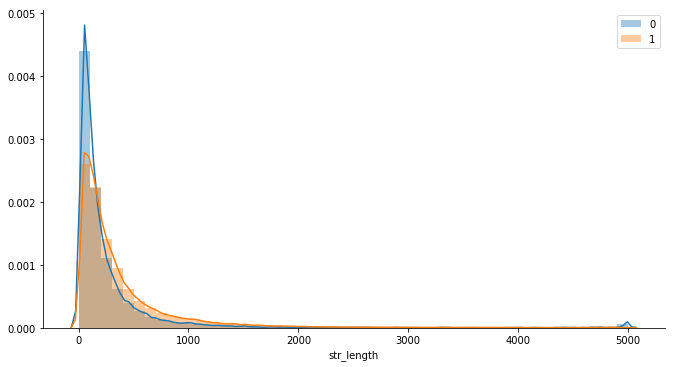

In [47]:
eda["str_length"] = eda["comment_text"].str.len()

g = sns.FacetGrid(eda, hue ="clean")
g.map(sns.distplot, "str_length")
g.fig.set_size_inches(12, 6)

plt.legend()

Apparently, length of the comment does not separate the clean and the toxic comments well.

On to the next section! We'll be checking for any noise within the data and any anomalies that can be found in the comments.

# How Clean Is The Data?

In [15]:
np.random.seed(10)

eda["comment_text"].sample(15, random_state = 10)

33683       And two WEEKS?! Bit of an abuse of power there.
65066     Eelam War IV \n\nCould you please see Eelam Wa...
115957    This is not true. Before the beginning of the ...
95080                           I will correct 141 to 14:1.
53051     He is bad man! He makes much vandalism! 177.15...
68469     http://en.wikipedia.org/wiki/Towns_in_the_Form...
153325    At the risk of sounding repetitive, I would li...
129511    "\n\n Regarding the ip 8.2.215.2 \n\n8.2.215.2...
104439    I am really confused about this.  There are so...
32167     Beat me to the sign fix\nWas just putting in t...
56155     "\n\nReviewing edits\nHi Endofskull,\n\nIt app...
75448     Okay, we have now heard from the parties invol...
20827     Would you like to be nominated for Sysop \n\nH...
1556      "\n\n Happy Valentine's day, dear Aaron! \n\nH...
140306    Finally, mention how many Germans lived in Ser...
Name: comment_text, dtype: object

### From these samples, here are some observations:
    
   - There are IP addresses found at the end of the corpus.
   - One comment only has an HTML link as its corpus.
   - Usernames are also found, look at example #11.
   - Presence of numerical characters.
   - Some words are all capitalized.
   - Other comments have time stamps in them.
   - Email addresses are also being used.
   - There are also words that are comprised of a single letter but is not part of the english dictionary.
   
### Now, how do these noises affect the performance of the algorithm?

When converting text into their numerical representations such as: bag of words model, term frequency - inverse document frequency, or word embeddings, it worth noting that a dataset filled with wrong spellings, and uneccesary terms can be very detrimental to any learning algorithm. This is because every unique word is treated differently, so wrongly spelled words will be categorized differntly by the computer and adding unecessary terms such as IP addresses and timestamps would lead the learning algorithm to think that it holds meaningful information when in fact, it does not.

### Pre - Processing

Cleaning of data will be done by:
    
   - Replacing some of the words into one uniform word:
        - Emoji's
        - Abbreviations
        - HTML tags
        - Email Addresses
   - Removing noisy text, such as:
        - Filename extensions
        - IP addresses
        - Hashtags
        - Multiple whitespaces